## Constants

In [2]:
DATA_PATH = 'C:\\Users\\Thrax\\Stackover_survey\\Survey_analysis\\data\\processed\\preprocessed_df.pkl'

# Important columns to analysis

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageWorkedWith',    'DatabaseWorkedWith',    'WebframeWorkedWith',    'MiscTechWorkedWith']
TECH_NEXT_COLS = ['LanguageDesireNextYear', 'DatabaseDesireNextYear', 'WebframeDesireNextYear', 'MiscTechDesireNextYear',]


## Import tools

In [49]:
# Reading data and preprocessing
import pandas as pd
import numpy as np

# visualize
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Sklearn
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

## Read the Data

In [4]:
raw_data = pd.read_pickle(DATA_PATH)

## Encode the technologies

In [5]:
df = raw_data.copy()
encoded_tech = pd.DataFrame()

# Enconde the important categorical columns by ' 1-hot encode '
for col in TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_col = pd.DataFrame(binarizer.fit_transform(df[col]), columns=binarizer.classes_, index=df[col].index)
    encoded_tech = pd.concat([encoded_tech, encoded_col], axis=1)
 

encoded_tech

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Dart,Go,HTML/CSS,Haskell,Java,...,Node.js,Pandas,Puppet,React Native,TensorFlow,Teraform,Torch/PyTorch,Unity 3D,Unreal Engine,Xamarin
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64457,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
64458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualize to get some insights

In [6]:
# Merge the encoded DataFrame
df = pd.concat([df, encoded_tech], axis=1)

In [7]:
explode_df = pd.DataFrame()  # unzip the list values in the columns

for cols in TECH_COLS + TECH_NEXT_COLS:
    explode_df[cols] = pd.Series(df.explode(cols)[cols].to_numpy()) 

In [8]:
skills_freq = explode_df.apply(pd.Series.value_counts).unstack().reset_index().dropna() # Group the skills and the frequencies
skills_freq.columns = ['Group', 'Skill', 'Freq']

skills_freq

,Group,Skill,Freq
8,LanguageWorkedWith,Assembly,3553.0
9,LanguageWorkedWith,Bash/Shell/PowerShell,18980.0
10,LanguageWorkedWith,C,12487.0
11,LanguageWorkedWith,C#,18041.0
12,LanguageWorkedWith,C++,13707.0
...,...,...,...
583,MiscTechDesireNextYear,Teraform,4104.0
584,MiscTechDesireNextYear,Torch/PyTorch,5101.0
586,MiscTechDesireNextYear,Unity 3D,7404.0
587,MiscTechDesireNextYear,Unreal Engine,4249.0


In [9]:
fig = px.treemap(skills_freq, 
                 path=[px.Constant('Proportion on languages and frameworks'), 'Group', 'Skill'], 
                 color_continuous_scale='deep',
                 values='Freq',color='Freq')

fig.update_layout(width=1400, height=700)

fig.show()

## Get the correlation between skills and Job title

In [50]:
roles_skills = pd.DataFrame()
roles_skills['DevType'] = df.explode('DevType')['DevType']
roles_skills = pd.concat([roles_skills, encoded_tech], axis=1)  
roles_skills.dropna(inplace=True)

In [51]:
skills_table = pd.pivot_table(data=roles_skills, index=['DevType'])
skills_table.head().sort_index(ascending=False)

,.NET,.NET Core,ASP.NET,ASP.NET Core,Angular,Angular.js,Ansible,Apache Spark,Assembly,Bash/Shell/PowerShell,...,TensorFlow,Teraform,Torch/PyTorch,TypeScript,Unity 3D,Unreal Engine,VBA,Vue.js,Xamarin,jQuery
DevType,,,,,,,,,,,,,,,,,,,,,
Designer,0.292426,0.199211,0.207104,0.148092,0.228341,0.169329,0.037399,0.028378,0.070288,0.301823,...,0.061079,0.023492,0.024056,0.278707,0.104680,0.040218,0.095283,0.173088,0.062958,0.457433
Database administrator,0.353897,0.250961,0.268263,0.200280,0.196435,0.160783,0.080916,0.042642,0.068508,0.434114,...,0.068508,0.053128,0.027962,0.242398,0.074624,0.026739,0.134918,0.165851,0.073051,0.476582
Data scientist or machine learning specialist,0.172016,0.134403,0.111585,0.093781,0.126379,0.107573,0.060933,0.156971,0.075226,0.395687,...,0.379388,0.051655,0.198345,0.139920,0.066449,0.027583,0.093280,0.098295,0.035858,0.241725
Data or business analyst,0.284543,0.192594,0.206014,0.152833,0.144881,0.122266,0.045229,0.084990,0.058400,0.346918,...,0.136431,0.033549,0.057903,0.168489,0.051938,0.020129,0.189612,0.104374,0.053181,0.336481
Academic researcher,0.199887,0.136543,0.130349,0.096284,0.151182,0.116836,0.048423,0.062218,0.108390,0.367680,...,0.199043,0.030968,0.100225,0.157939,0.078829,0.029561,0.079673,0.112331,0.043919,0.298986


In [52]:
fig = go.Figure(data=go.Heatmap(z=skills_table.values, x=skills_table.columns,y=skills_table.index, colorscale='magma', ygap=2))
fig.update_layout(width=1600, height=700)
fig.show()


## Plot the dendrogram clustering
#### This plot will show the correlated titles 

In [53]:
fig = ff.create_dendrogram(skills_table.values, labels=skills_table.index, orientation='left', color_threshold=1.5)
fig.update_layout(height=600, width=600, showlegend=False) 
fig.show()


## Normalize the Heat map

#### The main goal of normalize the skills is to be more specific, the normal heatmap above depend on the frequency and this cause domination
#### Normalize the frequency will make the skills more specific to some titles

In [62]:
std_skills = StandardScaler().fit_transform(skills_table)
std_skills = pd.DataFrame(std_skills, columns=skills_table.columns, index=skills_table.index)

In [63]:
fig = go.Figure(data=go.Heatmap(z=std_skills.values, x=std_skills.columns,y=std_skills.index, colorscale='magma', ygap=2))
fig.update_layout(width=1600, height=700)
fig.show()

## What is the most common technologies in Data science?

In [118]:
role = 'Data scientist or machine learning specialist'
top_15 = skills_table.loc[role].sort_values(ascending=False)
fig = px.bar(top_15.head(15), color=top_15.head(15))


fig.update_layout(
    title=f"The most common technologies used by {role}",
    xaxis_title='Technologies',
    yaxis_title="Ratio",
    width=800, height=800,
    showlegend=False
   
)

fig.show()


## Are men and women code for hobby?

In [148]:
men_vs_momen = df.loc[:, ['Gender', 'Hobbyist']]
men_vs_momen = men_vs_momen.explode('Gender')
men_vs_momen = men_vs_momen.value_counts().head(4)

<AxesSubplot:xlabel='Gender,Hobbyist'>

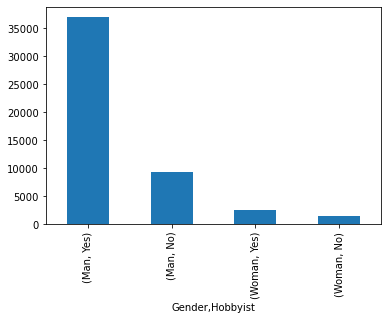

In [150]:
men_vs_momen.plot(kind='bar')

## What is the most common roles in Egypt?

In [162]:
# How many Egyptian respond?
len(df[df['Country'] == 'Egypt'])

281

In [167]:
egypt_data = df[df['Country'] == 'Egypt']
egypt_data= egypt_data.explode('DevType')
egy_sorted = egypt_data['DevType'].value_counts().sort_values(ascending=True)
fig = px.bar(egy_sorted, color=egy_sorted, orientation='h')

fig.update_layout(
    title=f"The most common technologies used by {role}",
    xaxis_title='Count',
    yaxis_title="Title",
    width=800, height=800,
    showlegend=False
   
)

fig.show()


## Which title earn more in Egypt?

In [174]:
title_earn = egypt_data.groupby('DevType')['ConvertedComp'].agg([np.median, np.mean, np.sum])
title_earn.sort_values(by='median', ascending=False)

,median,mean,sum
DevType,,,
Senior executive/VP,61200.0,61200.000000,61200.0
Product manager,30768.0,30768.000000,30768.0
Engineering manager,22692.0,27927.000000,111708.0
"Developer, QA or test",10764.0,10764.000000,10764.0
"Developer, game or graphics",10656.0,19628.000000,117768.0
"Developer, embedded applications or devices",9888.0,9888.000000,19776.0
"Developer, full-stack",9228.0,15886.428571,667230.0
"Developer, back-end",8460.0,14051.444444,632315.0
System administrator,8268.0,8268.000000,16536.0


## From the first look, the data has some problems in salaries
#### Let's see it globaly

In [185]:
global_salaris = df.explode('DevType')
global_salaris.groupby('DevType')['ConvertedComp'].mean().sort_values(ascending=False).head(10)

""""
Here we can see: Data scientist or machine learning specialist appears in the first 10
seems logical comparable to the Egypt Data

"""


DevType
Senior executive/VP                              155010.026515
Engineering manager                              152102.136316
Marketing or sales professional                  149901.096096
Engineer, site reliability                       147103.356946
Engineer, data                                   125454.218274
Data scientist or machine learning specialist    123911.183276
Product manager                                  120308.004896
DevOps specialist                                117256.690296
Data or business analyst                         117228.031972
Developer, embedded applications or devices      116052.122971
Name: ConvertedComp, dtype: float64

## Which countries has the higher salary in the first 10 jobs?

In [188]:
# get the names of the jobs
highest_ten_jobs = global_salaris.groupby('DevType')['ConvertedComp'].mean().sort_values(ascending=False).head(10).index

In [198]:
top_ten = global_salaris.loc[global_salaris['DevType'].isin(highest_ten_jobs)]
top_ten.groupby(['Country','DevType'])['ConvertedComp'].mean().sort_values(ascending=False).dropna().head(15)

Country             DevType                                      
Nomadic             Marketing or sales professional                  2000000.0
                    Developer, embedded applications or devices      2000000.0
                    Data scientist or machine learning specialist    2000000.0
                    Engineer, site reliability                       1660000.0
Hong Kong (S.A.R.)  Product manager                                  1095000.0
Nomadic             Senior executive/VP                              1075000.0
                    Engineer, data                                   1047500.0
                    DevOps specialist                                1047500.0
Nepal               Developer, embedded applications or devices      1043776.5
Nomadic             Product manager                                  1019457.5
Nepal               Engineer, site reliability                       1009456.0
Uzbekistan          Data scientist or machine learning specialist